# **Laboratory 2:** Image Processing

Image processing is a set of methods to perform some operations on an image, in order to get a new enhanced image. Other times, we intend to extract some useful information from it, e.g. illumination, orientation, edges. In the course, we mostly see two families of methods: *Point Processing* and *Image Filtering*. They are different from each other in the way they treat each pixel. While *Point Processing* focuses on each pixel at a time, *Image Filtering* also considers the neighbouring area around a pixel to define its new value. The present lab will focus on these two sets of methods.



## 1. Point Processing
Point processing helps us manipulate every pixel of an image by applying a transformation. This is
defined by:

<center>$g(x, y) = T [f(x, y)]$ </center>

Where $g(x, y)$ is the output image. In this section, we will see different $T$ transformations.  

### 1.1 Negative Transformation
The first transformation inverts the identity transformation to get the negative of a picture. To do so, each pixel of the input image is subtracted from the $L-1$ and mapped onto the output image, where $L = 2^k$ and $k$ = number of bits to save a pixel in the image.

As explained in class, if the pixels of an image will save only 6 grey levels, we will only need 3 bits because we can save up to 7 grey levels (111 in binary) in this setup. Otherwise, we would need to consider 4. Normally, we save up to 256 grey values per pixel, consequently the values for $L$ and $k$ will be $2^8$ and $8 bits$, respectively.


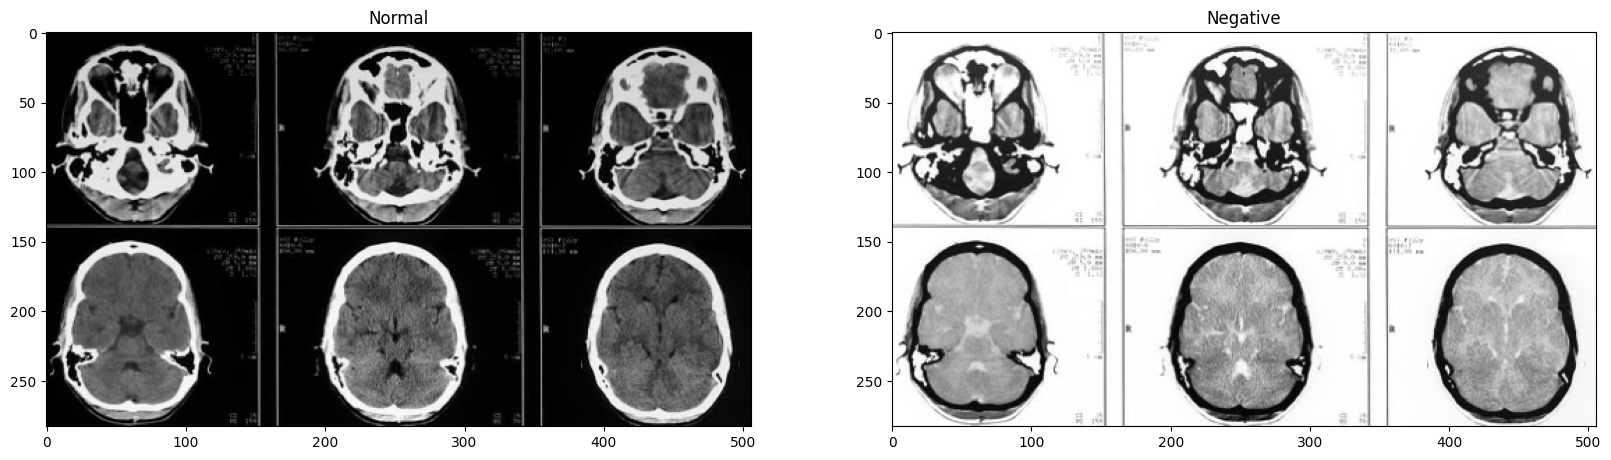

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import requests
import shutil
from google.colab import files, drive
import zipfile

%matplotlib inline

# read and convert the image to grayscale
image = cv2.imread("ct.png")
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# bitwise lets us perform and, or, not operations. bitwise_not will negate the values.
image_negative = 255 - image

# plot both images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Normal')
ax1.imshow(image, cmap='gray')
ax2.set_title('Negative')
ax2.imshow(image_negative, cmap='gray');

### 1.2 Exponential or Power Law Transformation

This transformation can help us make corrections to the intensity levels of an image. For example, if the picture was taken in a very sunny or dark day.

The transformation is defined by the following formula: $T(f)= (f(x,y)+esp)^γ$ where $esp$ and $γ$ are defined by us. Morevoer, $γ$ is also known as the gamma factor.

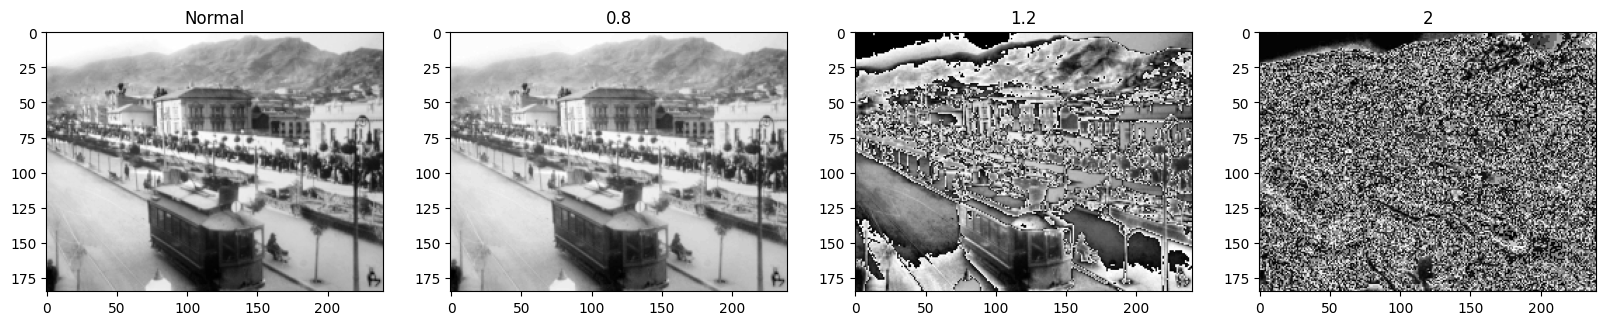

In [ ]:
# Read and convert the image to grayscale
image = cv2.imread("lapaz.png")
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

gammas = [0.8, 1.2, 2]

gamma_corrected = []

for gamma in gammas:

    # Apply gamma correction.
    gamma_corrected.append(np.array((image+1) ** gamma, dtype = 'uint8'))

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('Normal')
ax1.imshow(image, cmap='gray')
ax2.set_title(gammas[0])
ax2.imshow(gamma_corrected[0], cmap='gray')
ax3.set_title(gammas[1])
ax3.imshow(gamma_corrected[1], cmap='gray')
ax4.set_title(gammas[2])
ax4.imshow(gamma_corrected[2], cmap='gray')

### 1.3 Histogram equalisation

Histogram equalisation lets us balance the contrast of an image; hopefully giving a more uniform distribution of the image pixels' intensities. The image's cumulative frequency plot can be used as to transform the intensities in the image in order to achieve this.

<center>
<img src='https://drive.google.com/uc?id=1L3d3B3SUzr7bdiAthdno1q_Zh7sNNdFX' width='40%'>
</center>

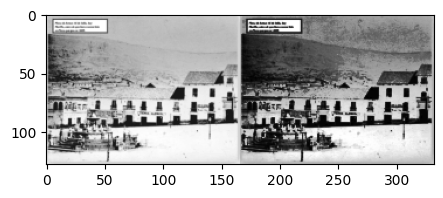

In [ ]:
# Read an image in grayscale
img = cv2.imread('murillo_square1.png',0)

# Gets an equalised image
equ = cv2.equalizeHist(img)

# Stacks images side-by-side
res = np.hstack((img,equ))

plt.rcParams["figure.figsize"] = (5,4)
plt.imshow(res,cmap="gray")

### 1.4 Contrast Limited Adaptive Histogram Equalisation

CLAHE is a method with better performance than HE. CLAHE is implemented in OpenCV as `cv2.createCLAHE()` and is based on adaptive histogram equalisation (AHE), where the histogram is calculated for equal segments in an image defined as. The  pixel's intensity is thus transformed to a new value within the display range proportional to the pixel intensity's rank in the local intensity histogram. In CLAHE, the enhancement calculation is modified by clipping a user-specified threshold, defined as the `clipLimit` parameter. The enhancement is thereby reduced in very uniform areas of the image, which prevents over enhancement of noise and reduces the edge-shadowing effect of unlimited
AHE. The size of the pixels' contextual region is defined in OpenCV as the `tileGridSize` parameter.

Text(0.5, 1.0, 'CLAHE')

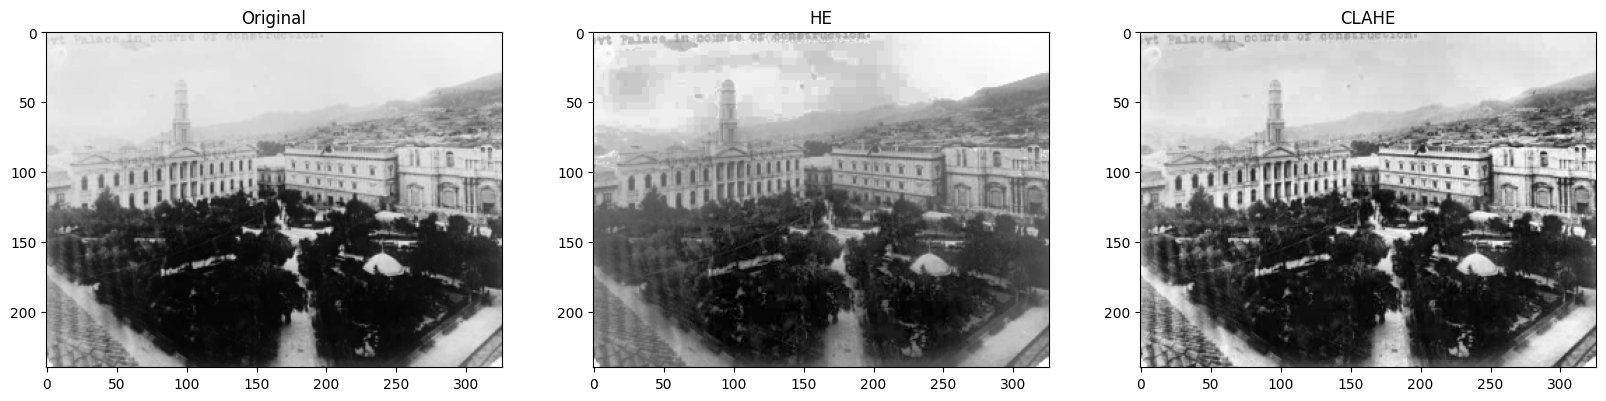

In [ ]:
# Read an image in grayscale
img = cv2.imread('murillo_square2.png',0)

# Create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl = clahe.apply(img)

# Gets an equalised image
equ = cv2.equalizeHist(img)

f, axarr = plt.subplots(1,3, figsize=(20, 10))
axarr[0].imshow(img, cmap="gray")
axarr[0].set_title("Original")

axarr[1].imshow(equ, cmap="gray")
axarr[1].set_title("HE")

axarr[2].imshow(cl, cmap="gray")
axarr[2].set_title("CLAHE")

## 2. High pass filters

High pass filtering is the first type of *Image Filtering* we will see in this lab. Mostly, a high-pass filter tries to sharpen an image or highlight useful features. That is the case of edges, which are crucial for image recognition tasks. Edges can provide clues about the elements and meaning of an image. Physically, an edge is the outside limit of an object, area, or surface. But, what is an edge inside a 2D image? They are significant local changes in the image where brightness changes drastically. These changes represent the boundary between two or more materially distinct regions or physical surfaces.

Conversely, edge detection is a challenging task because edges are not always clear due to lightning or shadows. So, many methods were researched since the 80s. First, let's see a couple of basic examples of filtering.

<img src='https://drive.google.com/uc?id=1HnxgN2sV0dhqkjklPkpEuoy51QR_T0Hx' width='40%'>



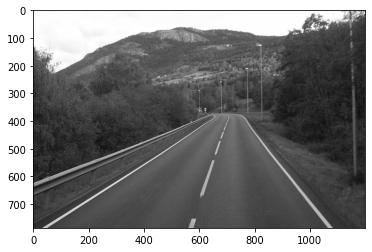

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('road.jpg')

# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

Create a custom kernel and filter the image



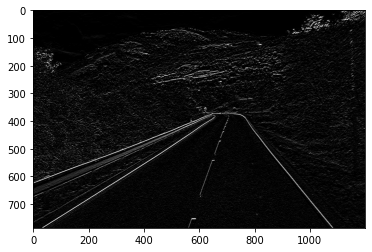

In [ ]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1],
                   [ 0, 0, 0],
                   [ 1, 2, 1]])

sobel_x = np.array([[-1, 0, 1],
                   [ -2, 0, 2],
                   [ -1, 0, 1]])

# Filter the image using filter2D, which has the parameters:
# Image: the target image
# bit-depth: the target bit-depth for the resulting image, leave it as -1 if you
# want to obtain the same format as the input image
# kernel: a 2d numpy array
filtered_image = cv2.filter2D(gray, -1, sobel_x)

plt.imshow(filtered_image, cmap='gray')

**💡 Exception management when reading and writing files:** There are three different ways to open and write files in Python. All of them differ in the exception handling. Just as a memory helper, let's remember the Try and Except structure:

```
try:
  # This block will test the excepted error to occur
except:  
  # Here you can handle the error
else:
  # If there is no exception then this block will be executed
Finally:
  # Finally block always gets executed either exception is generated or not
```
Now, compare the following file handling approaches:






In [ ]:
# 1) Direct approach
file = open('helloworld.txt', 'w')
file.write('hello world !')
file.close()

# 2) Using the try, except structure
file = open('helloworld.txt', 'w')
try:
    file.write('hello world !')
finally:
    file.close()

# 3) Using the with statement
with open('helloworld.txt', 'w') as file:
    file.write('hello world !')

Notice that unlike the first two implementations, there is no need to call `file.close()` when using the `with` statement. The `with` statement itself ensures proper acquisition and release of resources. An exception during the `file.write()` call in the first implementation can prevent the file from closing properly which may introduce several bugs in the code, i.e. many changes in files do not go into effect until the file is properly closed.

The second approach in the above example takes care of all the exceptions but using the `with` statement makes the code compact and much more readable. Thus, `with` statement helps avoiding bugs and leaks by ensuring that a resource is properly released when the code using the resource is completely executed. The `with` statement is popularly used with file streams, as shown above, as well as with cameras, sockets, subprocesses and telnets etc.

Exception handling is useful for the following high-pass filtering application example, where we use the `cv2.Sobel` and `cv2.Laplacian` functions.

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.robots.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


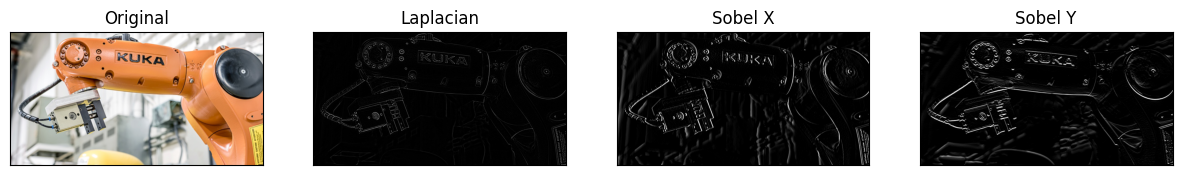

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os, requests

# Download an image
downloaded_image = requests.get("https://www.robots.com/images/general/_1200x630_crop_center-center_82_none/KUKA_Robot_Small_EOAT.png" , verify=False).content
# Open a file in writing and binary modes.
# Options are "r" for reading, "w" for writing, "b" for binary, "t" for text, "a" for appending new content, and "x" for creating the file or creating an exception if it already exists.
with open('image.jpg', 'wb') as file:
    file.write(downloaded_image)

image = cv2.imread('image.jpg')
image_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Blur the image, this will be better explained in the following section
# So far, it requires the following parameters:
# image: the target image to blur
# kernel size: a tuple with the dimensions of the kernel
# border type: it specifies how the boundaries are going to be filled to implement the kernel
# where 0 specifies black padding
img = cv2.GaussianBlur(image_gray,(3,3),0)

# Convolute with proper kernels
# Notice that these methods have a similar behaviour than cv2.filter2D but don't
# require to specify a kernel. cv2.CV_8U means UINT8 the type of image for filtered image.
# Sobel have two additional parameters to specify in which direction will be oriented the kernel
# You can expand the effect by specifying these parameters as 2 or more
laplacian = cv2.Laplacian(img, cv2.CV_8U)
sobelx = cv2.Sobel(img, cv2.CV_8U, 1, 0,ksize=3) # derivative x
sobely = cv2.Sobel(img, cv2.CV_8U, 0, 1,ksize=3)  # derivative y

images = [image_color, laplacian, sobelx, sobely]
titles = ['Original', 'Laplacian', 'Sobel X', 'Sobel Y']

plt.rcParams["figure.figsize"] = (15,4)
for num, (image, title) in enumerate(zip(images, titles)):
  plt.subplot(1,4,num+1)
  plt.imshow(image,cmap = 'gray')
  plt.title(title)
  plt.xticks([])
  plt.yticks([]);

## 2. Low-pass Filters

So far, you applied high-pass filters to sharpen an image or to find its edges. Now, you will implement low-pass filters to smooth an image so that its high-frequency elements are minimised. This can be quite helpful before applying Edge Detection methods to minimise the existent noise. First, let's add some noise to an image to see the efects of low-pass filters.

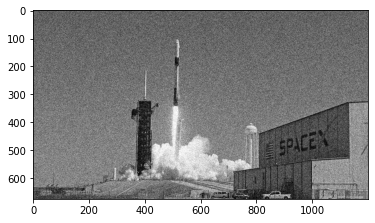

In [ ]:
import matplotlib.image as mpimg
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Scikit-image is part of the well-known machine learning library Scikit-learn,
# which includes multiple ML functions. Specifically, Scikit-image
# is a collection of algorithms for image processing. It is available free of charge and
# free of restriction. When using one of its functions, you should experiment if its
# performance/efficiency is better than the implementations in opencv, numpy or other libraries.
# This time, we will only use it for noise generation.
from skimage.util import random_noise

# Read in the image
image = mpimg.imread('spacex.jpeg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap="gray")

# Add noise with Scikit-image
# parameters: an image, type of noise (options: "gaussian", "pepper", "s&p"), and
# variance of random distribution
noise_img = random_noise(gray, mode='gaussian',var=0.02)
plt.imshow(noise_img, cmap="gray")

### 2.1 Mean Filter

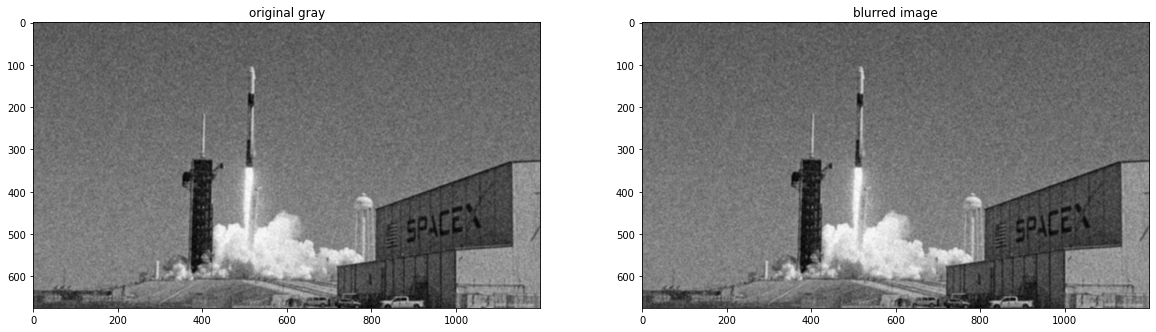

In [ ]:
copy = np.copy(noise_img)

# Create the kernel
num_rows, num_cols = 5 , 5
total = num_rows*num_cols
kernel = np.ones((num_rows,num_cols),np.float32)/total

# Convolves the image with the kernel
# You might want to extend the size of the kernel to obtain a more noticeable effect
mean = cv2.filter2D(copy, -1, kernel)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(mean, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(mean, cmap='gray')

### 2.2 Median Filter

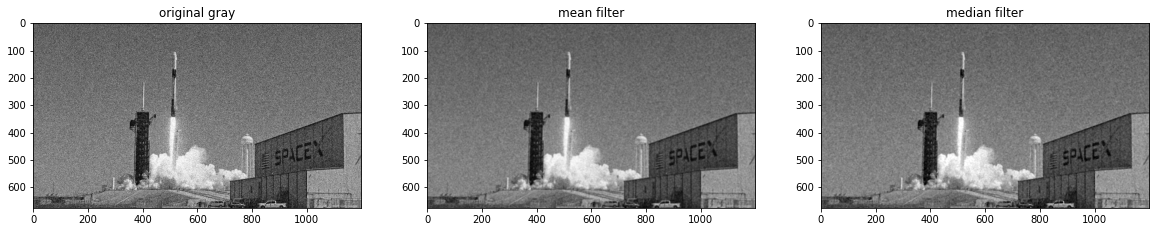

In [ ]:
copy2 = np.copy(noise_img)

# Apply median filter
# parameters: image, size of the kernel
median = cv2.medianBlur(np.float32(copy2),5)

# show and compare the resutls
f, (ax1, ax2, ax3) = plt.subplots(1 , 3, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(noise_img, cmap='gray')

ax2.set_title('mean filter')
ax2.imshow(mean, cmap='gray')

ax3.set_title('median filter')
ax3.imshow(median, cmap='gray')

### 2.3 Gaussian Filter

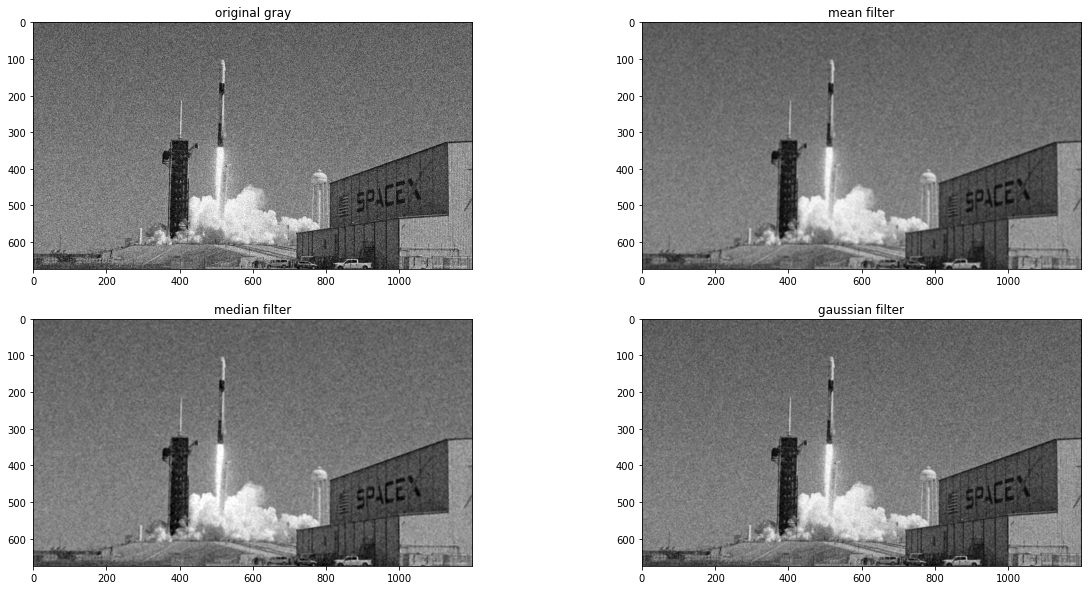

In [ ]:
copy3 = np.copy(noise_img)

# Applies gaussian blur with standar deviation  = 0
kernel_size = 5
# parameters: image, kernel dimensions, sigma x, sigma y
gaussian = cv2.GaussianBlur(copy3,(kernel_size,kernel_size),0,0)

# shows the results
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2 , 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(noise_img, cmap='gray')

ax2.set_title('mean filter')
ax2.imshow(mean, cmap='gray')

ax3.set_title('median filter')
ax3.imshow(median, cmap='gray')

ax4.set_title('gaussian filter')
ax4.imshow(gaussian, cmap='gray')

### 2.4 Bilateral Filter

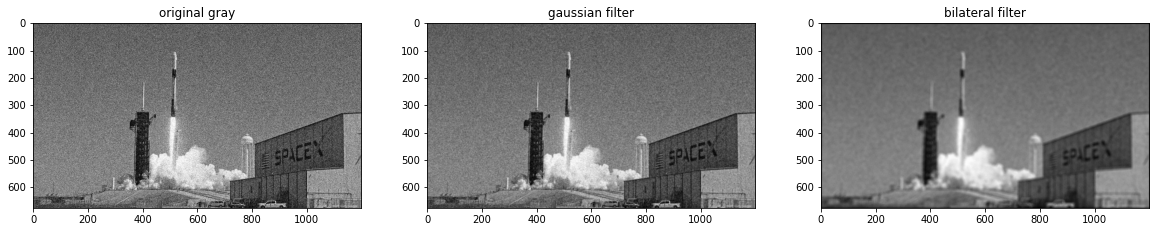

In [ ]:
copy4 = np.copy(noise_img)

# Apply bilateral filtering
# parameters: image in float32 format, kernel size, sigmaColor for intensity gaussian,
# sigmaSpace for coordinates gaussian, border type used to extrapolate pixels
# outside of the image. See https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/enum_cv_BorderTypes.html
# for more details
bilateral = cv2.bilateralFilter(np.float32(copy4),15,75,75, borderType=cv2.BORDER_CONSTANT)

f, (ax1, ax2, ax3) = plt.subplots(1 , 3, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(copy4, cmap='gray')

ax2.set_title('gaussian filter')
ax2.imshow(gaussian, cmap='gray')

ax3.set_title('bilateral filter')
ax3.imshow(bilateral, cmap='gray')

## 3. Canny Edge Detection

The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images. It was developed by John F. Canny in 1986, and it is widely used by computer vision professionals because of its efficiency removing noise as well as detecting edges. On the other hand, there are many methods that came up in later years, but just a few are that known as the Canny Edge Detector.


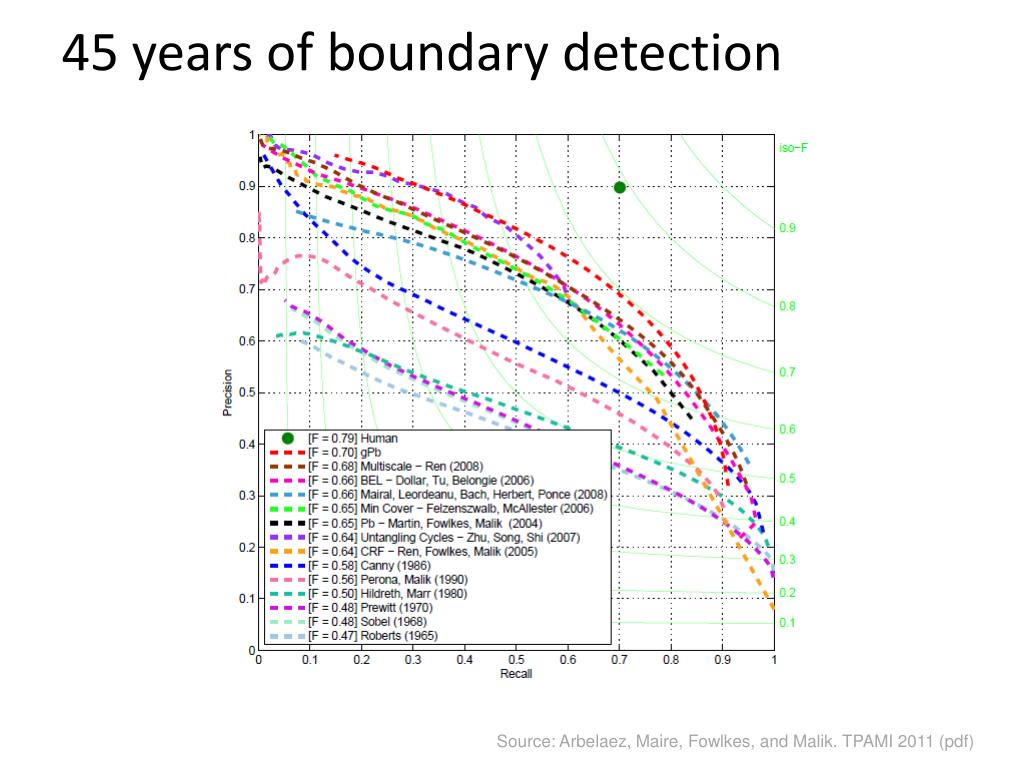

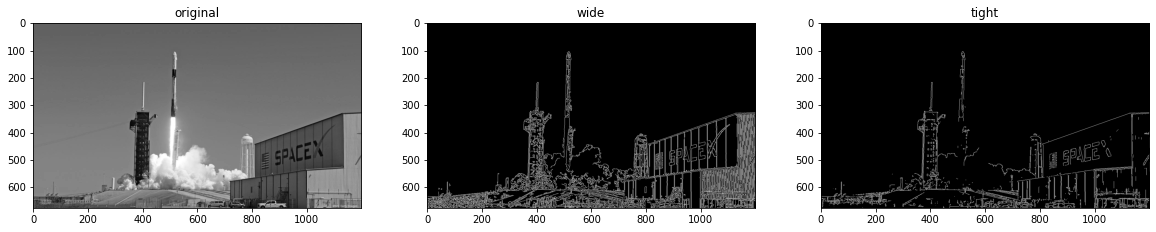

In [ ]:
# Read in the image
image = cv2.imread('spacex.jpeg',0)

# Try Canny using "wide" and "tight" thresholds
wide = cv2.Canny(gray, 30, 100)
tight = cv2.Canny(gray, 200, 240)

# Display the images
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('original')
ax1.imshow(image, cmap='gray')

ax2.set_title('wide')
ax2.imshow(wide, cmap='gray')

ax3.set_title('tight')
ax3.imshow(tight, cmap='gray')

## **Exercise 1:** Histogram Matching

Although applying image processing libraries makes programming easier, it is important to understand the inner working of image processing methods to enhance them. Consequently, you now have to implement Histogram Matching by leveraging an implementation of [histogram equalisation](https://gist.github.com/EdwinTSalcedo/2c37ee0bc29aa7e9e6e978417070c66e).

Consider the following steps to implement Histogram Equalisation for the target and template images:
- Load an image and convert it to grayscale
- Calculate the gray level frequency histogram
- Calculate probability for each histogram element, namely the probability density distribution (PDF).
- Calculate the cumulative probability distribution (CDF). Consider the numpy function cumsum.
- Multiply the CDF by the maximum intensity for each intensity
- Round everything

Histogram matching requires to complete these steps for both images. However, it replaces the new values of a new version of the target image considering the CDF of the template image. Therefore, you will have to create a function that accepts two images (a target image and a template image) and returns the target image enhanced.

## **Exercise 2:** High-Pass Filtering

So far, you learned to use `cv2.filter2D`, `cv2.Sobel` and `cv2.Laplacian` to apply a convolution to a target image. Now, you will have to implement a function elaborated from scracth to apply convolutions by passing an image, a type of kernel as a string, and the kernel size. Internally, you'll have to convolute the image without using OpenCV. Consider using [notebook forms](https://colab.research.google.com/notebooks/forms.ipynb) to change the parameters (target image, type of kernel, and kernel size) easily.




## **Exercise 3:** Image Noise

The difference between artefacts and noise is that noise may obscure features in a constant pattern inside an image (remember salt & pepper, or ISO noise). In contrast, artefacts are features that were mistakenly captured by a camera, sensor or the photographer.

If the 'noise' has a defined shape and frequently locates over a certain region inside the images, it's probably an artefact, whereas if it's random and locates over the entire image, it's probably noise (as a generalisation). Removing artefacts and noise from images is an ongoing research field, and there have been compelling achievements by deep learning architectures.

This time, you will have to code functions by yourselves to generate noise over an image, given the parameters specified by the user. Try to use Colab Forms and mimic the behaviour shown by the `skimage` library. Provide the users with the following options:
- Poison noise
- Gaussian noise
- Salt and Pepper noise

Your function should show the original image and the noisy sample side by side.

## **Exercise 4:** Mean Square Error

To continue with the previous exercise, you will have to implement a function that applies the OpenCV filters explained in section 3. Low-Pass Filters. Although you can show the filtered versions (with Mean Filter, Median Filter, Gaussian Filter and Bilateral Filter) of a noisy image obtained with your noise generation function, it will be more important to calculate the Mean Square Error (MSE) between the original image and the cleaned samples to measure how effective are the low-pass filters. Use the formula of the MSE:

<center>$MSE=\dfrac{\sum_{i=1}^{D}(x_i-y_i)^2}{image size} $</center>

## **Exercise 5:** AHE

For this exercise, you will have to implement Adaptive Histogram Equalisation (AHE) based on **convolutions**. This means that you will have to analyse a pixel's neighbourhood at a time, apply histogram equalisation and find the new value for the pixel. Try to leverage your implementation for Exercise 2. Also, consider defining the kernel size using Notebook Forms.

## **Exercise 6:** Medical Image Processing

A doctor diagnosed a patient with a benign tumour, and the patient needed urgent surgery to prevent any worse situation. Later, the surgery was completed successfully, and the patient was asked to take Computerised Tomography (CT) exams every month. The first exam was alright but, sadly, the image analysis equipment was broken, and the maintenance provider scheduled a technician in the next two weeks.

Can you give them a hand?

For this exercise, they give you both images (the previous and current exams), your task will be to:

1. Split and clean both images. You can implement CLAHE or other point procesing methods if necessary. Both images must be binarized and only contain borders.

2. Get a diagnosis based on the differences between both images. This means that you have to identify automatically if the patient has improved). Make sure that you clearly show the existent tumours in the previous exam (possibly with a bounding box) by detecting the differences between both images. Hint: You can apply a method similar to AHE or try to translate the image in the x axis to find the perfect overlap of the skull.

You can find the image sample at: https://drive.google.com/file/d/1pV8_cUtI70tNNTL-o-ZPyK-tU0fOwv3t/view?usp=sharing

## **Exercise 7:** Artefacts

For this exercise, you will have to investigate about a type of artefact and propose potential ways to remove it with the methods seen in class. Although you are encouraged to propose image examples and specify a cleaning strategy, you are not expected to implement the method this time. Most importantly, explain the artefact with your own words. References to papers will be valorated highly this time. If you find difficulties with the artefact, you can propose a different one.

The assignation of artefacts is defined as follows:

- Chromatic Aberration → Dinamita
- Ghosting → Lineac
- Red eyes → PPG
- Moiré Patterns → Alpha Team
- JPEG Compression Artifacts → NDA

